In [39]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pymc3 as pm
import arviz as az

模拟获得采样数据

In [40]:
np.random.seed(42)
trials = 5
theta = 0.5 # 正面朝上的概率
samples = stats.bernoulli.rvs(p=theta, size=trials)

对$\theta$分布进行估计

In [41]:
with pm.Model() as our_first_model:
    # 采样一个theta先验
    theta = pm.Beta("theta", alpha=1, beta=1)
    
    # 根据上述先验获得似然
    y = pm.Bernoulli("y", p=theta, observed=samples)
    
    # 对theta随机采样推理
    trace = pm.sample(1000, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


显示模型结构

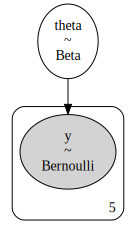

In [42]:
pm.model_graph.model_to_graphviz(our_first_model)

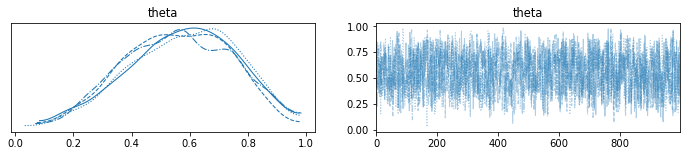

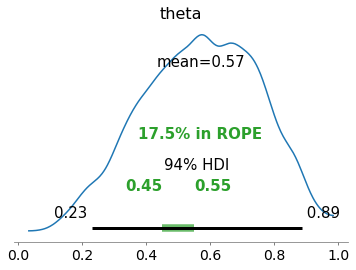

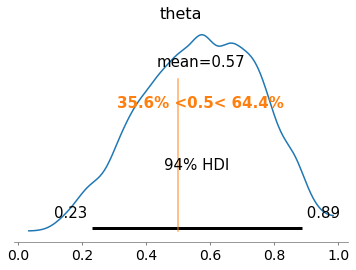

In [43]:
# 总结后验
with our_first_model:
    az.plot_trace(trace)
    az.summary(trace)
    
    az.plot_posterior(trace, rope=[0.45, 0.55])
    az.plot_posterior(trace, ref_val=0.5)

绘制损失函数并对待估计参数进行点估计

In [44]:
theta_pos = trace["theta"]
theta_pos.shape

(4000,)

In [45]:
theta_grid = np.linspace(0, 1, 100)
theta_pos = trace["theta"]

loss_quadratic = [np.mean((theta_pos - p)**2) for p in theta_grid]  # 二次损失即均值
loss_mean = [np.mean(np.abs(theta_pos - p)) for p in theta_grid]  # 绝对损失即中位数

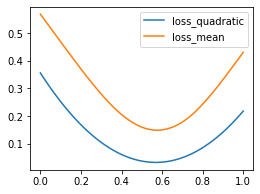

In [46]:
plt.figure(figsize=(4, 3))
plt.plot(theta_grid, loss_quadratic, label="loss_quadratic")
plt.plot(theta_grid, loss_mean, label="loss_mean")
plt.legend()